### Analysis of Deaf Schools in America, 2026

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium as fm
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

##### Load data

In [5]:
schools = pd.read_csv('../data/deaf_schools/clean/deaf_schools2026.csv',index_col=False)

##### Basic EDA

In [6]:
schools.head()

,name,yr_est,yrs_opr,address,city,state,zip,mascot,gr_served,day_or_res,website,lat,long
0,Alabama Institute for the Deaf and Blind,1858,168,205 South Street East,Talladega,Alabama,35160,Silent Warriors,PreK-12,Residential,https://www.aidb.org,33.43083,-86.0992
1,Alaska State School for the Deaf and Hard of H...,1973,53,5530 E Northern Lights Blvd,Anchorage,Alaska,99504,Seals,PreK-12,Residential,https://www.asdk12.org/aksdhh,61.19399,-149.7750
2,American School for the Deaf,1817,209,139 North Main Street,West Hartford,Connecticut,06107,Tigers,K-12,Residential,http://www.asd-1817.org/,41.77111,-72.7471
3,Arizona State Schools for the Deaf and Blind,1912,114,1200 W Speedway Blvd,Tucson,Arizona,85745,Sentinels,PreK-12,Residential,https://asdb.az.gov/tucsoncampus/,32.23709,-110.9900
4,Arkansas School for the Deaf,1849,177,2400 W Markham St,Little Rock,Arkansas,72205,Leopards,PreK-12,Residential,https://asd.ade.arkansas.gov/,34.75164,-92.2978


In [7]:
schools.shape

(71, 13)

In [8]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        71 non-null     object 
 1   yr_est      71 non-null     int64  
 2   yrs_opr     71 non-null     int64  
 3   address     71 non-null     object 
 4   city        71 non-null     object 
 5   state       71 non-null     object 
 6   zip         71 non-null     object 
 7   mascot      65 non-null     object 
 8   gr_served   71 non-null     object 
 9   day_or_res  71 non-null     object 
 10  website     71 non-null     object 
 11  lat         71 non-null     float64
 12  long        71 non-null     float64
dtypes: float64(2), int64(2), object(9)
memory usage: 7.3+ KB


In [9]:
schools.describe()

,yr_est,yrs_opr,lat,long
count,71.000000,71.000000,71.000000,71.000000
mean,1895.535211,130.464789,39.250226,-90.439317
std,53.967935,53.967935,5.239260,18.625034
min,1817.000000,6.000000,21.273350,-157.815000
25%,1854.500000,86.500000,35.728630,-98.308050
50%,1876.000000,150.000000,39.834780,-84.444600
75%,1939.500000,171.500000,41.940940,-76.250500
max,2020.000000,209.000000,61.193990,-70.232700


In [10]:
schools.columns.tolist()

['name',
 'yr_est',
 'yrs_opr',
 'address',
 'city',
 'state',
 'zip',
 'mascot',
 'gr_served',
 'day_or_res',
 'website',
 'lat',
 'long']

In [11]:
schools.nunique()

name          71
yr_est        58
yrs_opr       58
address       69
city          67
state         45
zip           69
mascot        45
gr_served      6
day_or_res     2
website       69
lat           71
long          71
dtype: int64

##### Geospatial Analysis

In [12]:
# lat/long to Points
geometry = [Point(xy) for xy in zip(schools['long'], schools['lat'])]

In [13]:
# geopandas dataframe
gdf = gpd.GeoDataFrame(schools, geometry=geometry)

In [14]:
# set coordinate ref system to WGS84
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)

,name,yr_est,yrs_opr,address,city,state,zip,mascot,gr_served,day_or_res,website,lat,long,geometry
0,Alabama Institute for the Deaf and Blind,1858,168,205 South Street East,Talladega,Alabama,35160,Silent Warriors,PreK-12,Residential,https://www.aidb.org,33.43083,-86.0992,POINT (-86.0992 33.43083)
1,Alaska State School for the Deaf and Hard of H...,1973,53,5530 E Northern Lights Blvd,Anchorage,Alaska,99504,Seals,PreK-12,Residential,https://www.asdk12.org/aksdhh,61.19399,-149.7750,POINT (-149.775 61.19399)
2,American School for the Deaf,1817,209,139 North Main Street,West Hartford,Connecticut,06107,Tigers,K-12,Residential,http://www.asd-1817.org/,41.77111,-72.7471,POINT (-72.7471 41.77111)
3,Arizona State Schools for the Deaf and Blind,1912,114,1200 W Speedway Blvd,Tucson,Arizona,85745,Sentinels,PreK-12,Residential,https://asdb.az.gov/tucsoncampus/,32.23709,-110.9900,POINT (-110.99 32.23709)
4,Arkansas School for the Deaf,1849,177,2400 W Markham St,Little Rock,Arkansas,72205,Leopards,PreK-12,Residential,https://asd.ade.arkansas.gov/,34.75164,-92.2978,POINT (-92.2978 34.75164)
5,Atlanta Area School for the Deaf,1972,54,890 N Indian Creek Drive,Clarkston,Georgia,30021,Panthers,PreK-12,Day,https://www.aasdweb.com/,33.80259,-84.2400,POINT (-84.24 33.80259)
6,Beverly School for the Deaf,1876,150,6 Echo Avenue,Beverly,Massachusetts,01915,NaN,PreK-12,Day,https://cccbsd.org/programs/beverly-school-for...,42.55650,-70.8929,POINT (-70.8929 42.5565)
7,Bruce Street School for the Deaf,1910,116,333 Clinton Place,Newark,New Jersey,07112,NaN,PreK-8,Day,https://www.nps.k12.nj.us/bru/our-school/,40.71260,-74.2153,POINT (-74.2153 40.7126)
8,"California School for the Deaf, Fremont",1860,166,39350 Gallaudet Drive,Fremont,California,94538,Eagles,PreK-12,Residential,https://www.csdeagles.com/,37.56081,-121.9640,POINT (-121.964 37.56081)
9,"California School for the Deaf, Riverside",1950,76,3044 Horace Street,Riverside,California,92506,Cubs,PIP-12,Residential,https://www.csdr-cde.ca.gov/,33.94483,-117.3830,POINT (-117.383 33.94483)


In [15]:
m = fm.Map(
    location=[37.0902, -95.7129],
    zoom_start=3,
    tiles='OpenStreetMap'
)

gdf.explore(
    m=m,
    color="red",
    marker_kwds=dict(radius=5, fill=True),
    tooltip=['name'],
    popup=['name', 'address', 'city', 'state', 'zip', 'yrs_opr', 'mascot', 'website'], 
    tooltip_kwds=dict(labels=False),
    name="deaf_schools",
)

m

##### Visualizations

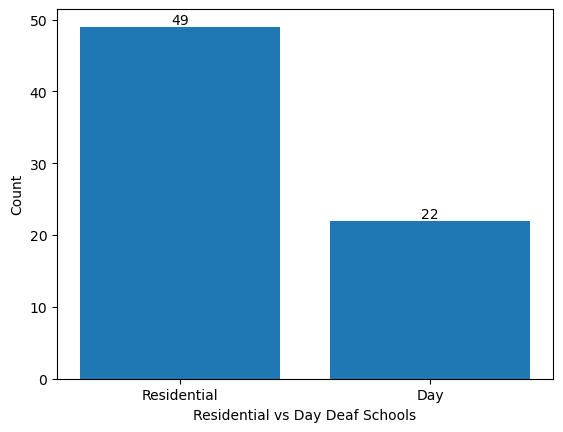

In [16]:
day_res_counts = schools['day_or_res'].value_counts()
bars = plt.bar(day_res_counts.index, day_res_counts)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')
    

plt.xlabel('Residential vs Day Deaf Schools')
plt.ylabel('Count')
plt.show()

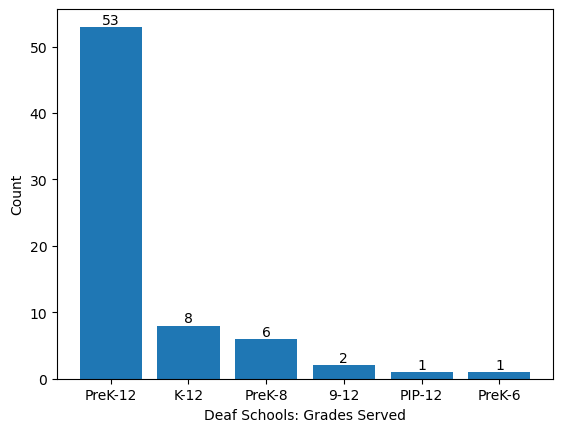

In [17]:
gr_served_cnts = schools['gr_served'].value_counts()
bars = plt.bar(gr_served_cnts.index, gr_served_cnts)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')
    

plt.xlabel('Deaf Schools: Grades Served')
plt.ylabel('Count')
plt.show()

In [18]:
filtered_schools = schools[schools['gr_served'] == 'PreK-12']
print("Deaf schools that serve PreK through 12:")
print("-----------------------------------")
for name in filtered_schools['name']:
    print(name)

Deaf schools that serve PreK through 12:
-----------------------------------
Alabama Institute for the Deaf and Blind
Alaska State School for the Deaf and Hard of Hearing
Arizona State Schools for the Deaf and Blind
Arkansas School for the Deaf
Atlanta Area School for the Deaf
Beverly School for the Deaf
California School for the Deaf, Fremont
Colorado School for the Deaf and Blind
Eastern North Carolina School for the Deaf
Florida School for the Deaf and Blind
Georgia School for the Deaf
Governor Baxter School for the Deaf
Horace Mann School for the Deaf and Hard of Hearing
Illinois School for the Deaf
Indiana School for the Deaf
Iowa School for the Deaf
Jean Massieu School for the Deaf
Kansas School for the Deaf
Kentucky School for the Deaf
Lexington School and Center for the Deaf
Louisiana School for the Deaf
Metro Deaf School
Michigan School for the Deaf
Minnesota State Academy for the Deaf
Mississippi School for the Deaf
Missouri School for the Deaf
Montana School for the Deaf and

In [19]:
filtered_schools = schools[schools['gr_served'] == 'K-12']
print("Deaf schools that serve K through 12:")
print("-----------------------------------")
for name in filtered_schools['name']:
    print(name)

Deaf schools that serve K through 12:
-----------------------------------
American School for the Deaf
Delaware School for the Deaf
Hawaii School for the Deaf and the Blind
Idaho School for the Deaf and the Blind
Marlton School
Maryland School for the Deaf - Frederick Campus
Oregon School for the Deaf
Washington School for the Deaf


In [20]:
filtered_schools = schools[schools['gr_served'] == 'PreK-8']
print("Deaf schools that serve PreK through 8:")
print("-----------------------------------")
for name in filtered_schools['name']:
    print(name)

Deaf schools that serve PreK through 8:
-----------------------------------
Bruce Street School for the Deaf
Kendall Demonstration Elementary School
Maryland School for the Deaf - Columbia Campus
P.S. 347 "47" The American Sign Language and English Lower School
St. Francis de Sales School for the Deaf
St. Joseph's School for the Deaf


In [21]:
filtered_schools = schools[schools['gr_served'] == '9-12']
print("Deaf schools that serve 9 through 12:")
print("-----------------------------------")
for name in filtered_schools['name']:
    print(name)

Deaf schools that serve 9 through 12:
-----------------------------------
Model Secondary School for the Deaf
P.S. 47 The American Sign Language and English Secondary School


In [22]:
filtered_schools = schools[schools['gr_served'] == 'PIP-12']
print("Deaf schools that serve PIP through 12:")
print("-----------------------------------")
for name in filtered_schools['name']:
    print(name)

Deaf schools that serve PIP through 12:
-----------------------------------
California School for the Deaf, Riverside


In [23]:
filtered_schools = schools[schools['gr_served'] == 'PreK-6']
print("Deaf schools that serve PreK through 6:")
print("-----------------------------------")
for name in filtered_schools['name']:
    print(name)

Deaf schools that serve PreK through 6:
-----------------------------------
West Tennessee School for the Deaf


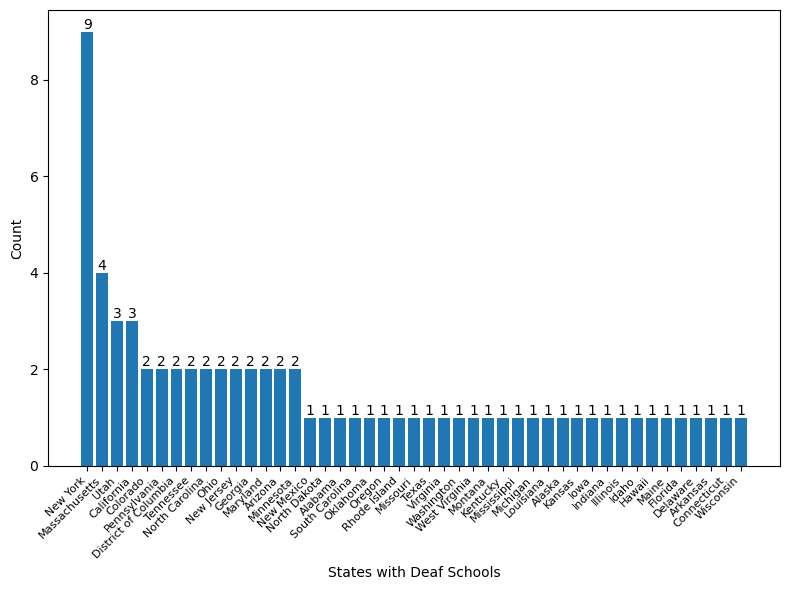

In [24]:
plt.figure(figsize=(8, 6))

state_cnts = schools['state'].value_counts()
bars = plt.bar(state_cnts.index, state_cnts)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')
    

plt.xlabel('States with Deaf Schools')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [25]:
schools_clean = schools.dropna(subset=['mascot'])

duplicate_mascot_groups = schools_clean[schools_clean.duplicated(subset='mascot', 
                                                                 keep=False)].sort_values(['mascot', 'name'])
print("\nSchools with duplicate mascots:")
print(duplicate_mascot_groups[['name', 'mascot']])


Schools with duplicate mascots:
                                                 name       mascot
10             Colorado School for the Deaf and Blind     Bulldogs
34                    Mississippi School for the Deaf     Bulldogs
43                   North Dakota School for the Deaf     Bulldogs
8             California School for the Deaf, Fremont       Eagles
28                                     Marlton School       Eagles
35                       Missouri School for the Deaf       Eagles
36                Model Secondary School for the Deaf       Eagles
62  Utah School for the Deaf and Blind - Ogden Campus       Eagles
68                 West Tennessee School for the Deaf       Eagles
57                       St. Rita School for the Deaf        Lions
66       West Virginia Schools for the Deaf and Blind        Lions
67           Western Pennsylvania School for the Deaf        Lions
20                        Indiana School for the Deaf      Orioles
29     Maryland School for th

In [39]:
schools_sorted_by_year = schools.sort_values('yr_est')

name_width = max(schools_sorted_by_year['name'].apply(len).max(), len('Name'))
est_width = max(schools_sorted_by_year['yr_est'].apply(lambda x: len(str(x))).max(), len('Established:'))
opr_width = max(schools_sorted_by_year['yrs_opr'].apply(lambda x: len(str(x))).max(), len('Operating for:'))

print(f"{'Name:'.ljust(name_width)} {'Established:'} {'Operating for:'}")

for index, row in schools_sorted_by_year.iterrows():
    print(f"{row['name'].ljust(name_width)} {str(row['yr_est']).ljust(est_width)} {str(row['yrs_opr'])
                                                                                    + ' years'.ljust(opr_width)}")

Name:                                                             Established: Operating for:
American School for the Deaf                                      1817         209 years        
New York School for the Deaf                                      1817         209 years        
Pennsylvania School for the Deaf                                  1820         206 years        
Kentucky School for the Deaf                                      1823         203 years        
Ohio School for the Deaf                                          1829         197 years        
Virginia School for the Deaf and the Blind                        1839         187 years        
Illinois School for the Deaf                                      1839         187 years        
Indiana School for the Deaf                                       1843         183 years        
Tennessee School for the Deaf                                     1845         181 years        
Georgia School for the Deaf      